Rate, Min Field, Max Field : (0.29111997962129593, 15.99756, 17.99999)
TDO2
['TIME', 'FIEL', 'SORB', 'POT1', 'POTH', 'PROB', 'TDO1', 'TDO2']
['TIME', 'FIEL', 'SORB', 'POT1', 'POTH', 'PROB', 'TDO1', 'TDO2']


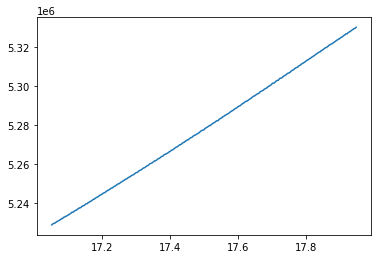

C:\Users\tusha\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


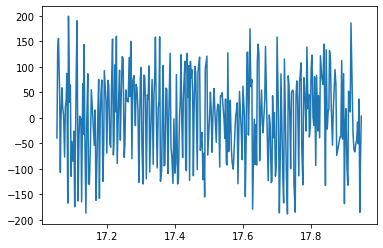

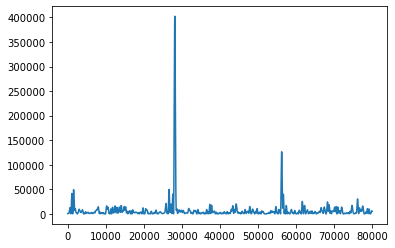

LombScargle


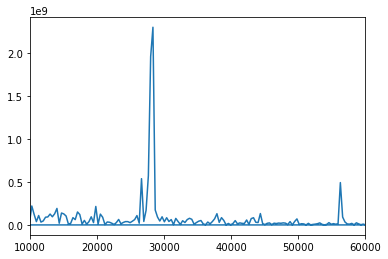

In [9]:
from fft__analysis import LSanalysis as fa
from sklearn.utils import resample
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from Rate import rate
import numpy as np
from Fourier import fourier
from colorama import Fore
for k in range(23,24):
    #print(k,"\n")
    
    start=17.05#desider starting field
    stop=17.95#desired end field
    tolerance=200#remove the bad data points by deleting anything that has an amplitude greater than 200 after fitting with polynomial, should be changed for different data set
    
    #dataname=['CH1_',]
    dataname=["TDO2"]#for different experiment we used name TDO1, TDO2, sorb1, sorb2 like that. Needs to change
    
    try:
        fn="Li_Na."+str(k).zfill(3)+".txt"#File name is different for different experiment. Should be changed otherwise file not found appears
        open(fn)
    except Exception:
        print(Fore.RED +"File not found for", k)
        continue
    print("Rate,","Min Field,","Max Field :", rate(fn))
    for j in dataname:
        ot1="LSP-"+j+"-"+str(int(np.floor(start)))+"-"+str(int(np.floor(stop)))+"."+str(k).zfill(3)+".dat"
        ot2="data-"+ot1
        
        print(Fore.BLACK+j)

        result=fa(fn, j, start, stop, tolerance)
        
        #print(result)
        if result[0]:
            f = open(ot1,'w')
            print("Frequency\t", "Power Spectrum\t", "Fourier Spectrum", file=f)
            print("T\tArbitrary\tArbitrary", file=f)
            
            g = open(ot2,'w')
            print("Field\t", j, "\tInv. Field\t", "Detrended", file=g)
            print("Tesla\tArbitrary\t1/Tesla\tArbitrary", file=g)            
            
            for i in range (len(result[1])):
                print('%15.7f \t%15.7f \t%15.7f \t%15.7f'%(result[1][i], result[2][i], result[3][i], result[4][i]), file=g)
            for i in range (len(result[5])):
                print('%15.7f \t%15.7f \t%15.7f'%(result[5][i], result[6][i], result[7][i]), file=f)
            plt.plot(result[5],result[6])# plotting the lomb-scargle frequency
            plt.show()
            print("LombScargle")
            fourier(result[3], result[4])#plotting the square of fourier transfored frequency
            
            ax=plt.gca()
            ax.set_xlim(10000,60000)
            